In [15]:
import matplotlib.pyplot as plt
import urllib.request as urllib
import numpy as np 

def getData(year, month, dekad):
    link = f'https://ftp.cpc.ncep.noaa.gov/fews/itf/data/itf_{year}_{str(month).zfill(2)}{dekad}.txt'     
    data = (urllib.urlopen(link).read().decode('utf-8')).strip()
    data = data.split('\n')[1:]

    for x in range(len(data)):
        data[x] = data[x].split(',')

    data = np.array(data)
    lats, lons = data[:, 0], data[:, 1]

    west = []
    east = []
    for x in range(len(lons)):
        if float(lons[x]) <= 10 and float(lons[x]) >= -10:
            west.append(float(lats[x]))
        elif float(lons[x]) >= 20 and float(lons[x]) <= 35:
            east.append(float(lats[x]))
    
    return np.nanmean(west), np.nanmean(east)

def getClimo(years, months, dekads, mean = True):
    allWests = []
    allEasts = []
    for year in years:
        wests = []
        easts = []
        for month in months:
            dWest = []
            dEast = []
            for dekad in dekads:
                try:
                    west, east = getData(year, month, dekad)
                except:
                    west, east = np.nan, np.nan
                dWest.append(west)
                dEast.append(east)
            wests.append(dWest)
            easts.append(dEast)
        allWests.append(wests)
        allEasts.append(easts)
    
    if mean:
        return np.nanmean(np.array(allWests), axis = 0), np.nanmean(np.array(allEasts), axis = 0)
    else:
        return np.array(allWests), np.array(allEasts)


In [18]:
years = range(1989, 2025)
colors = ['#bf3030', "#bfbf30", "#30bf30", '#30bfbf', '#3030bf', '#bf30bf']
westClimo, eastClimo = getClimo(range(1989, 2025), range(1, 13), range(1, 4), mean = False)

C:\Users\deela\AppData\Local\Temp\ipykernel_65104\1964929063.py:24: RuntimeWarning: Mean of empty slice
  return np.nanmean(west), np.nanmean(east)


In [19]:
print(westClimo)
print(westClimo.shape)

[[[  nan   nan   nan]
  [  nan   nan   nan]
  [  nan   nan   nan]
  ...
  [16.52 14.14 11.18]
  [  nan   nan   nan]
  [  nan   nan   nan]]

 [[  nan   nan   nan]
  [  nan   nan   nan]
  [  nan   nan   nan]
  ...
  [15.46 13.7  12.7 ]
  [  nan   nan   nan]
  [  nan   nan   nan]]

 [[  nan   nan   nan]
  [  nan   nan   nan]
  [  nan   nan   nan]
  ...
  [15.82 14.72 12.94]
  [  nan   nan   nan]
  [  nan   nan   nan]]

 ...

 [[  nan   nan   nan]
  [  nan   nan   nan]
  [  nan 10.02 10.14]
  ...
  [17.62 15.02 10.6 ]
  [  nan   nan   nan]
  [  nan   nan   nan]]

 [[  nan   nan   nan]
  [  nan   nan   nan]
  [  nan   nan   nan]
  ...
  [15.16 13.9  12.54]
  [11.08  9.32 10.48]
  [  nan  6.3    nan]]

 [[ 7.86  7.36  6.48]
  [ 6.78  7.64  8.26]
  [ 9.86  9.62 10.28]
  ...
  [17.78 16.3  12.5 ]
  [ 9.4   8.64  7.76]
  [ 7.44  7.28  7.24]]]
(36, 12, 3)


In [ ]:
test = np.nanmean(westClimo, axis = 2)
print(test.shape)

(36, 12)


C:\Users\deela\AppData\Local\Temp\ipykernel_65104\1770795921.py:1: RuntimeWarning: Mean of empty slice
  test = np.nanmean(westClimo, axis = 2)


In [26]:
import pandas as pd 

data = pd.DataFrame(test)
data.to_csv(r"C:\Users\deela\Downloads\westAfricaITF.csv")
print(data)

          0     1      2          3          4          5          6   \
0        NaN   NaN    NaN  11.566667  14.120000  16.320000  18.586667   
1        NaN   NaN    NaN  12.726667  14.853333  16.080000  18.346667   
2        NaN   NaN    NaN  12.906667  15.540000  16.433333  18.520000   
3        NaN   NaN    NaN  11.853333  14.820000  16.040000  18.453333   
4        NaN   NaN    NaN  12.060000  14.293333  16.033333  18.000000   
5        NaN   NaN    NaN  11.973333  14.193333  16.320000  18.833333   
6        NaN   NaN    NaN  13.053333  14.526667  16.313333  18.500000   
7        NaN   NaN    NaN  12.500000  14.813333  16.320000  17.573333   
8        NaN   NaN    NaN  12.640000  14.746667  16.733333  18.066667   
9        NaN   NaN    NaN  12.900000  15.373333  16.573333  18.233333   
10       NaN   NaN    NaN  13.920000  14.420000  15.486667  18.940000   
11       NaN   NaN    NaN  12.926667  14.580000  16.313333  18.940000   
12       NaN   NaN    NaN  12.520000  14.420000  16

C:\Users\deela\AppData\Local\Temp\ipykernel_65104\2900794852.py:24: RuntimeWarning: Mean of empty slice
  return np.nanmean(west), np.nanmean(east)
C:\Users\deela\AppData\Local\Temp\ipykernel_65104\2900794852.py:43: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.array(allWests), axis = 0), np.nanmean(np.array(allEasts), axis = 0)


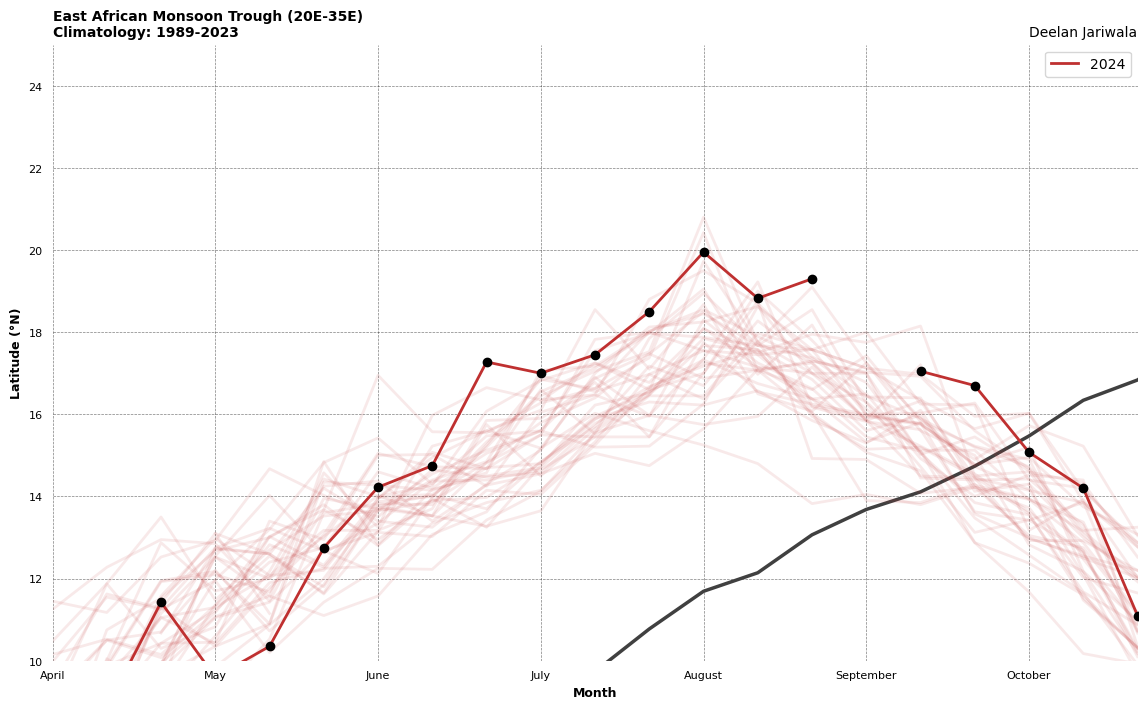

In [3]:
fig = plt.figure(figsize=(14, 8))

# Add the map and set the extent
ax = plt.axes()
ax.set_frame_on(False)

# Add state boundaries to plot
ax.tick_params(axis='both', labelsize=8, left = False, bottom = False)
ax.grid(linestyle = '--', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)
ax.set_ylabel('Latitude (\u00b0N)', weight = 'bold', size = 9)
ax.set_xlabel('Month', weight = 'bold', size = 9)
ax.set_ylim(10, 25)
ax.set_xlim(0, 20)
ax.set_xticks(range(0, 21, 3))
ax.set_xticklabels(['April', 'May', 'June', 'July', 'August', 'September', 'October'])

ax.plot(range(len(eastClimo)), eastClimo, linewidth = 2.5, color = '#404040')
for x in range(len(years)):
    westData, eastData = getClimo([years[x]], range(4, 11), range(1, 4))
    ax.plot(range(len(eastData)), eastData, linewidth = 2, color = colors[0], alpha = .1)#, label = str(years[x]))
    #ax.scatter(range(len(westData)), westData, color = 'black', zorder = 10, alpha = .1)
westData, eastData = getClimo([2024], range(4, 11), range(1, 4))
ax.plot(range(len(eastData)), eastData, linewidth = 2, color = colors[0], label = '2024')
ax.scatter(range(len(eastData)), eastData, color = 'black', zorder = 10)

plt.legend()
plt.title(f'East African Monsoon Trough (20E-35E)\nClimatology: 1989-2023' , fontweight='bold', fontsize=10, loc='left')
#plt.title(f'{year}', fontsize = 10, loc = 'center')
plt.title('Deelan Jariwala', fontsize=10, loc='right')  
# plt.savefig(r"C:\Users\deela\Downloads\africaitfclimo2.png", dpi = 200, bbox_inches = 'tight')

plt.show()